## CSCI 4897 - Computational Modeling of Infectious Diseases, Homework 1
*Matthew Schneider*

### Problem 1 code

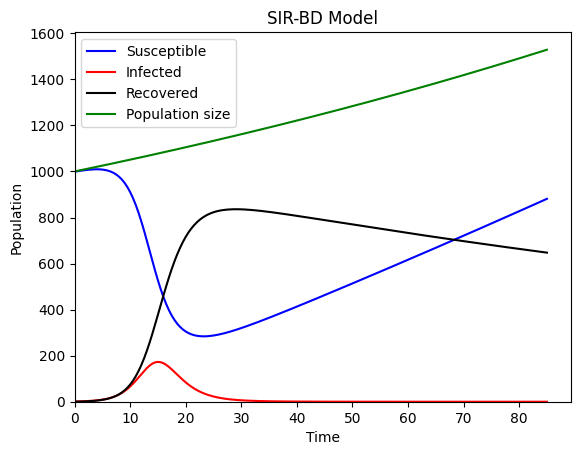

<Figure size 640x480 with 0 Axes>

In [ ]:
# problem 1 code
# first we use the function from the lecture demo for SIR with birth and death and add our new values epsilon and delta
import matplotlib.pyplot as plt

# using the model
N0 = 1000
I0 = 1
S0 = 999
R0 = 0
beta = 1
gamma = 0.5
epsilon = 0.01
delta = epsilon/2
t_max = 85

import importlib, public.models.SIR_BD
importlib.reload(public.models.SIR_BD)
from public.models.SIR_BD import SIR_BD

model = SIR_BD(N0, S0, I0, R0, beta, gamma, epsilon, delta, t_max, 0.5)
model.run_model()
model.plot(show=True)

# plt.savefig("1_birth_death.png")



### Problem 3b code

{0.9: 0.0, 1.0: 1.0562002383807112e-08, 1.1: 0.17613414363181, 1.2: 0.31369833104121775}


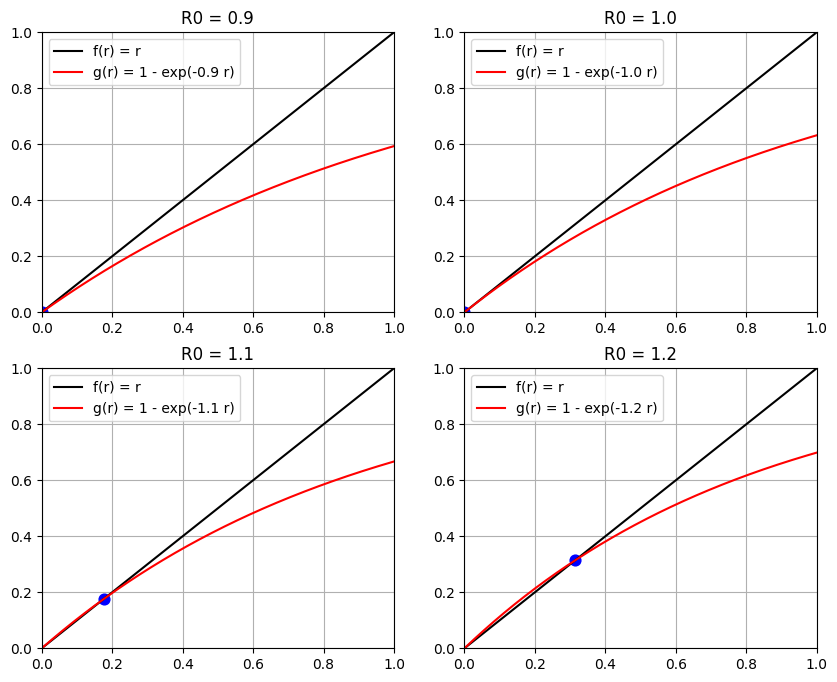

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# identity function
def f(r):
    return r

def g(r, R0):
    return 1 - np.exp(-R0 * r)

# we can find when f = g by defining a functin that has roots when f = g
# this is useful for when we use fsolve to find the roots of a function
def h(r, R0):
    return f(r) - g(r, R0)

# plottong R0 values
R0 = [0.9, 1.0, 1.1, 1.2] 

# for saving R0 and its root as a pair
intersections = {}

# domain for r_inf as a fraction of the population
r = np.linspace(0, 1, 500)

# 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, R in zip(axes.flatten(), R0):
    # choose initial guess for fsolve based on R0
    # for R0 <= 1, guess close to 0. for R0 > 1, guess > 0, say 0.5
    guess = 0.5 if R > 1.0 else 1e-5
    root = fsolve(lambda r: h(r, R), guess)[0]

    # remove floating point errors
    if abs(root) < 1e-8:
        root = 0.0

    intersections[R] = float(root)

    # plot f and g
    ax.plot(r, f(r), color='black', label='f(r) = r')
    ax.plot(r, g(r, R), color='red', label=f'g(r) = 1 - exp(-{R} r)')
    
    # Mark the intersection
    ax.scatter([root], [f(root)], color='blue', s=60)
    
    # plot settings
    ax.set_title(f'R0 = {R}')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True)
    ax.legend()


print(intersections)
# plt.savefig("3b_r_plots.png")

### Problem 3d code

r_inf for R0=2.0 is approximately 0.797, or 796.812 people


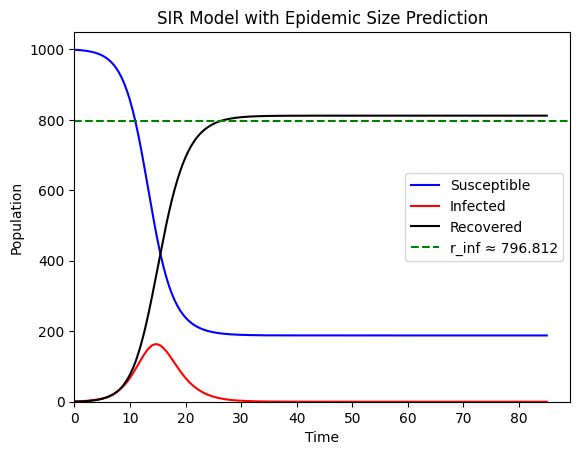

In [3]:
import importlib, public.models.SIR
importlib.reload(public.models.SIR)
from public.models.SIR import SIRModel

# Finally, test the predictions made by this final-size equation by using your SIR code and $\beta = 1$,
# $\gamma = 0.5$ by creating a new version of that epidemic with a green dotted line at the height of $r_{\infty}$.
# Does this final size prediction work?

# this question is asking us to solve r_inf using an R0 of beta/gamma = 1/0.5 = 2, then plot this line on our SIR graph

N0 = 1000
I0 = 1
S0 = 999
R0 = 0
beta = 1
gamma = 0.5
epsilon = 0.01
delta = epsilon/2
t_max = 85

model = SIRModel(S0, I0, R0, beta, gamma, t_max, 0.5)
model.run_model()
fig, ax = model.plot(show=False)

# values of r_inf we evaluate
r = np.linspace(0, 1, 500)
R0 = beta/gamma

def h(r, R0):
    return (r) - (1 - np.exp(-R0 * r))

r_inf = fsolve(lambda r: h(r, R0), 0.5)[0]
print(f'r_inf for R0={R0} is approximately {r_inf:.3f}, or {round(r_inf * N0, 3)} people')

# since r_inf is a proportion, we multiply by N0 to get the actual number of people
r_inf = r_inf * N0

ax.axhline(y=r_inf, color='green', linestyle='--', label=f'r_inf ≈ {r_inf:.3f}')
ax.legend()
ax.set_title("SIR Model with Epidemic Size Prediction")
plt.show()

# plt.savefig("3d_SIR_with_r_inf.png")

### Problem 4 code

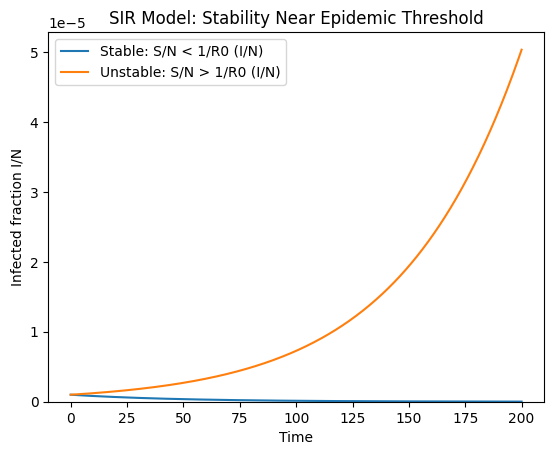

In [4]:
import importlib, public.models.SIR
importlib.reload(public.models.SIR)
from public.models.SIR import SIRModel

# parameters
N0 = int(1e6)
beta = 1.0
gamma = 0.5            # R0 = 2 -> threshold s* = 0.5
t_max = 200
h = 0.5
s_star = gamma / beta  # epidemic threshold

# choose a visible offset from threshold (e.g., 2%)
offset = 0.02

cases = [
    ("Stable: S/N < 1/R0",  s_star - offset),
    ("Unstable: S/N > 1/R0", s_star + offset),
]

fig, ax = plt.subplots()

for title, s_frac in cases:
    S0 = int(s_frac * N0)
    I0 = 1                         # epsilon*N = 1 person, epsion = 1/N
    r0 = N0 - S0 - I0              # rest are immune to set S/N as desired

    model = SIRModel(S0, I0, r0, beta, gamma, t_max, h)
    S, I, R, T = model.run_model()

    # plot FRACTIONS so small changes are visible
    ax.plot(T, I / N0, label=f"{title} (I/N)")

ax.set_xlabel("Time")
ax.set_ylabel("Infected fraction I/N")
ax.legend()
ax.set_ylim(bottom=0)
ax.set_title("SIR Model: Stability Near Epidemic Threshold")
plt.show()

# plt.savefig("4_stability_near_threshold.png")
